# Baseline Model - Logistic Regression with F1 score as metric

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import datetime as dt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.utils import class_weight

In [2]:
# importing model-ready data

df = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/data2_model_ready_2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   Unnamed: 0.1             10000 non-null  int64  
 2   amt                      10000 non-null  float64
 3   city_pop                 10000 non-null  int64  
 4   is_fraud                 10000 non-null  int64  
 5   trans_year               10000 non-null  int64  
 6   trans_month              10000 non-null  int64  
 7   trans_day                10000 non-null  int64  
 8   category_gas_transport   10000 non-null  int64  
 9   category_home            10000 non-null  int64  
 10  category_grocery_pos     10000 non-null  int64  
 11  category_kids_pets       10000 non-null  int64  
 12  category_shopping_pos    10000 non-null  int64  
 13  category_shopping_net    10000 non-null  int64  
 14  category_entertainment 

# Splitting into X features and y target dataframes

In [4]:
orig_feats = [col for col in df.columns if 'is_fraud' not in col]

len(orig_feats)

19

In [5]:
X = df[orig_feats]
y = df['is_fraud']
y=y.astype('int')

# Using stratified sampling during split-train-test for data consistency

In [6]:
# Use stratify to ensure samples of fraud label are in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 19) (2500, 19) (7500,) (2500,)


# Modeling straight-out-of-sample with inherent class imbalance problem with f1 score for test data being 0.0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       0.00      0.00      0.00        15

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500

The f1 score for the testing data: 0.0


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


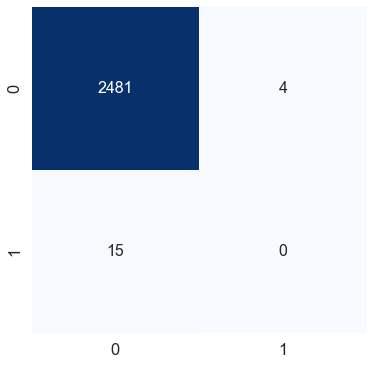

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Classification Report

print(classification_report(y_test, pred_test))

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

# Modeling straight-out-of-sample with inherent class imbalance problem with class_weight='balanced' in LogisticRegression function yielding f1 score for test data of 0.06

The f1 score for the testing data: 0.06521739130434782


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


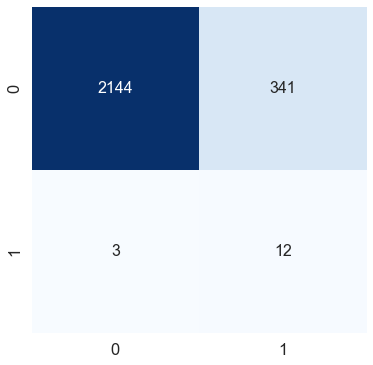

In [80]:
#Import and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

# Using GridSearchCV to find optimal hyperparameters ('penalty', 'C', 'solver', 'max_iter') for LogisticRegression function with the following results:
# Best params:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
# Best estimator:  LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
# Best score:  0.0 (f1 score)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logmodel= LogisticRegression()
param_grid = {
'penalty' : ['l1', 'l2', 'none'],
'C' : np.logspace(-4, 4, 20),
'solver' : ['lbfgs','newton-cg','liblinear'],
'max_iter' : [100, 1000,2500]
}
logcls_us = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1, scoring='f1')
bestlogcls_us = logcls_us.fit(X_train, y_train)
bestlogcls_us.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


C:\Users\New User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise 

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [82]:
# examine the best model

print("Best params: ", bestlogcls_us.best_params_)
print("Best estimator: ", bestlogcls_us.best_estimator_)
print("Best score: ", bestlogcls_us.best_score_)

Best params:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
Best score:  0.0


In [16]:
# BEST PARAMETERS SO FAR

# Best params:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
# Best estimator:  LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
# Best score:  0.0

# Re-train model with best hyperparameters found above yielding f1 score of 0.18 for test data. A slight improvement from 0.06 above.

The f1 score for the testing data: 0.18333333333333335


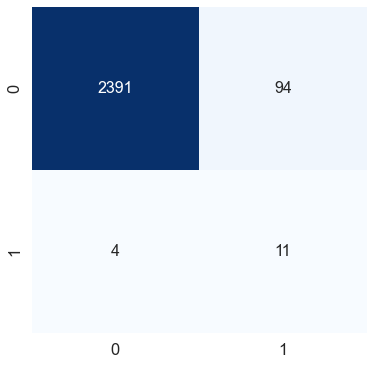

In [83]:
#Import and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', class_weight='balanced', C=0.0001, penalty='l1')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

# Using RandomizedSearchCV to find best hyperparameters

In [44]:
# from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
# from scipy.stats import loguniform

In [45]:
# # define model
# model = LogisticRegression()

In [46]:
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [47]:
# # define search space
# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# space['C'] = loguniform(1e-5, 100)

In [49]:
# # define search
# search = RandomizedSearchCV(model, space, n_iter=500, scoring='f1', n_jobs=-1, cv=cv, random_state=1)

In [50]:
# # execute search
# result = search.fit(X, y)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\New User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\New User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    rai

Best Score: 0.0
Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
# Best Score: 0.0
# Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}

# Finding optimal class weights using a manual method and GridSearchCV yielding best f1 score: 0.415851 using {'class_weight': {0: 1, 1: 10}}

In [84]:
lr = LogisticRegression(solver='liblinear', C=0.0001, penalty='l1')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)



# define grid search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.415851 using {'class_weight': {0: 1, 1: 10}}
0.000000 (0.000000) with: {'class_weight': {0: 100, 1: 1}}
0.000000 (0.000000) with: {'class_weight': {0: 10, 1: 1}}
0.000000 (0.000000) with: {'class_weight': {0: 1, 1: 1}}
0.415851 (0.085923) with: {'class_weight': {0: 1, 1: 10}}
0.254854 (0.041452) with: {'class_weight': {0: 1, 1: 100}}


In [85]:
# Refining Search With Narrower Search Field
lr = LogisticRegression(solver='liblinear', C=0.0001, penalty='l1')

# define grid
balance = [{0:1,1:10}, {0:1,1:11},{0:1,1:12}, {0:1,1:13}, {0:1,1:14}]
param_grid = dict(class_weight=balance)



# define grid search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.439329 using {'class_weight': {0: 1, 1: 12}}
0.415851 (0.085923) with: {'class_weight': {0: 1, 1: 10}}
0.428218 (0.086311) with: {'class_weight': {0: 1, 1: 11}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 13}}
0.412291 (0.076650) with: {'class_weight': {0: 1, 1: 14}}


In [ ]:
# Best: 0.439329 using {'class_weight': {0: 1, 1: 12}}
# 0.415851 (0.085923) with: {'class_weight': {0: 1, 1: 10}}
# 0.428218 (0.086311) with: {'class_weight': {0: 1, 1: 11}}
# 0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12}}
# 0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 13}}
# 0.412291 (0.076650) with: {'class_weight': {0: 1, 1: 14}}

In [86]:
# Refining Search With Narrower Search Field
lr = LogisticRegression(solver='liblinear', C=0.0001, penalty='l1')

# define grid
balance = [{0:1,1:12.2}, {0:1,1:12.4},{0:1,1:12.6}, {0:1,1:12.8}, {0:1,1:13}]
param_grid = dict(class_weight=balance)



# define grid search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1, scoring='f1')

grid_result = grid.fit(X_train, y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.439329 using {'class_weight': {0: 1, 1: 12.2}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12.2}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12.4}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12.6}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 12.8}}
0.439329 (0.091126) with: {'class_weight': {0: 1, 1: 13}}


# Re-train model using best hyperparameters and best class weights found above. The model yields f1 score of 0.47 for test data. A significant improvement from 0.18 of just using best function hyperparameters alone. 

The f1 score for the testing data: 0.47058823529411764


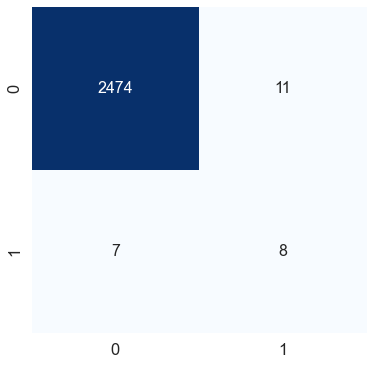

In [90]:
#Import and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=0.0001, penalty='l1')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

# Scaling using both Standard and MinMaxScaler for X_train and X_test features and f1 score slightly improved to .48 with C increased from .0001 to C=10

In [58]:
# with Standarad scaling
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [25]:
# with MinMaxScaler
scaler = MinMaxScaler()  #A
X_train_scaled_2 = scaler.fit_transform(X_train)   #B
X_test_scaled_2 = scaler.transform(X_test)     #C

The f1 score for the testing data: 0.4848484848484848


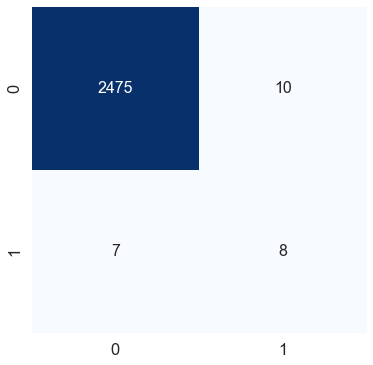

In [92]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train_scaled, y_train)

#Test data prediction
pred_test = lr.predict(X_test_scaled)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

# Changing class boundary decision threshold to optimize F1 score

In [93]:
from sklearn.metrics import roc_curve, f1_score

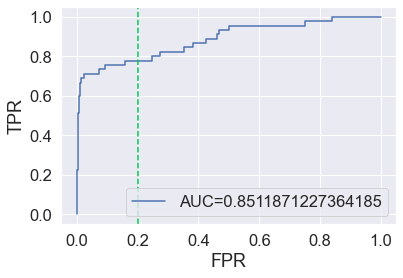

In [159]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytrain_pred_probas = lr.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve


_ = plt.figure()
# plt.plot(roc.FPR, roc.TPR)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.axvline(0.2, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

In [111]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytest_pred_probas = lr.predict_proba(X_test)[:, 1]
new_threshold = 0.1   # 0.5 is the default value
ytest_pred = (ytest_pred_probas >= new_threshold).astype(int)

print("After change threshold to 0.2, the F1 score on Test data is:")
print (f1_score(y_test, ytest_pred))
print("After change threshold to 0.2, the recall socre on Test data is:")
print (recall_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the precision socre on Test data is:")
print (precision_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the Confusion Matrix on Test data is:")
print (confusion_matrix(y_test, ytest_pred))

After change threshold to 0.2, the F1 score on Test data is:
0.2608695652173913
After change threshold to 0.2, the recall socre on Test data is:
0.8

 After change threshold to 0.2, the precision socre on Test data is:
0.15584415584415584

 After change threshold to 0.2, the Confusion Matrix on Test data is:
[[2420   65]
 [   3   12]]


In [112]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytest_pred_probas = lr.predict_proba(X_test)[:, 1]
new_threshold = 0.05   # 0.5 is the default value
ytest_pred = (ytest_pred_probas >= new_threshold).astype(int)

print("After change threshold to 0.2, the F1 score on Test data is:")
print (f1_score(y_test, ytest_pred))
print("After change threshold to 0.2, the recall score on Test data is:")
print (recall_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the precision score on Test data is:")
print (precision_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the Confusion Matrix on Test data is:")
print (confusion_matrix(y_test, ytest_pred))

After change threshold to 0.2, the F1 score on Test data is:
0.04848484848484849
After change threshold to 0.2, the recall score on Test data is:
0.8

 After change threshold to 0.2, the precision score on Test data is:
0.025

 After change threshold to 0.2, the Confusion Matrix on Test data is:
[[2017  468]
 [   3   12]]


In [113]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytest_pred_probas = lr.predict_proba(X_test)[:, 1]
new_threshold = 0.005   # 0.5 is the default value
ytest_pred = (ytest_pred_probas >= new_threshold).astype(int)

print("After change threshold to 0.2, the F1 score on Test data is:")
print (f1_score(y_test, ytest_pred))
print("After change threshold to 0.2, the recall score on Test data is:")
print (recall_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the precision score on Test data is:")
print (precision_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the Confusion Matrix on Test data is:")
print (confusion_matrix(y_test, ytest_pred))

After change threshold to 0.2, the F1 score on Test data is:
0.012556053811659194
After change threshold to 0.2, the recall score on Test data is:
0.9333333333333333

 After change threshold to 0.2, the precision score on Test data is:
0.006320541760722348

 After change threshold to 0.2, the Confusion Matrix on Test data is:
[[ 284 2201]
 [   1   14]]


In [114]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytest_pred_probas = lr.predict_proba(X_test)[:, 1]
new_threshold = 0.01   # 0.5 is the default value
ytest_pred = (ytest_pred_probas >= new_threshold).astype(int)

print("After change threshold to 0.2, the F1 score on Test data is:")
print (f1_score(y_test, ytest_pred))
print("After change threshold to 0.2, the recall score on Test data is:")
print (recall_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the precision score on Test data is:")
print (precision_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the Confusion Matrix on Test data is:")
print (confusion_matrix(y_test, ytest_pred))

After change threshold to 0.2, the F1 score on Test data is:
0.015359297860669226
After change threshold to 0.2, the recall score on Test data is:
0.9333333333333333

 After change threshold to 0.2, the precision score on Test data is:
0.007743362831858407

 After change threshold to 0.2, the Confusion Matrix on Test data is:
[[ 691 1794]
 [   1   14]]


In [118]:
lr = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1')
lr.fit(X_train, y_train)
ytest_pred_probas = lr.predict_proba(X_test)[:, 1]
new_threshold = .7   # 0.5 is the default value
ytest_pred = (ytest_pred_probas >= new_threshold).astype(int)

print("After change threshold to 0.2, the F1 score on Test data is:")
print (f1_score(y_test, ytest_pred))
print("After change threshold to 0.2, the recall score on Test data is:")
print (recall_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the precision score on Test data is:")
print (precision_score(y_test, ytest_pred))
print("\n After change threshold to 0.2, the Confusion Matrix on Test data is:")
print (confusion_matrix(y_test, ytest_pred))

After change threshold to 0.2, the F1 score on Test data is:
0.4000000000000001
After change threshold to 0.2, the recall score on Test data is:
0.4

 After change threshold to 0.2, the precision score on Test data is:
0.4

 After change threshold to 0.2, the Confusion Matrix on Test data is:
[[2476    9]
 [   9    6]]


# Best Logistic Regression F1 score = 0.4848

# KNN MODELING

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       0.00      0.00      0.00        15

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500



C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let's use Cross-Validation to find Optimal K

In [31]:
# 10-fold cross-validation with K=5 for KNN(the n_neighbors parameter)

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
print(scores)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
print(scores.mean())

0.0


In [33]:
# search for an optimal value of K for KNN

k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')
    k_scores.append(scores.mean())
print(k_scores)

[0.0757936507936508, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0, 0.5, 'Cross-Validated F1 Score')

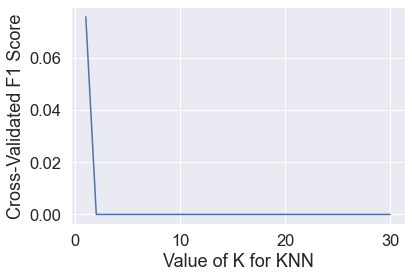

In [35]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1 Score')

In [36]:
# Let's retrain KNN model with k = 1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       0.00      0.00      0.00        15

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500



# Let's use GridSearchCV to find optimal K

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# define the parameter values that should be searched

k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [39]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [40]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1')

In [41]:
# fit the grid with data
grid.fit(X_train, y_train);

In [42]:
grid.cv_results_

{'mean_fit_time': array([0.00240221, 0.00250311, 0.00240214, 0.00240233, 0.00230212,
        0.00240242, 0.00210216, 0.0025023 , 0.00240214, 0.0028033 ,
        0.00220282, 0.00240214, 0.0025022 , 0.00240228, 0.00240297,
        0.00260246, 0.00240211, 0.00260224, 0.00260262, 0.00270247,
        0.00240216, 0.00230217, 0.00350363, 0.00270145, 0.00260167,
        0.00240211, 0.00240228, 0.00260243, 0.00270319, 0.0025023 ,
        0.00280266, 0.00260255, 0.00230134, 0.00260231, 0.00230203,
        0.00210195, 0.00230215, 0.0027025 , 0.00250232, 0.00260231,
        0.00270233, 0.0023021 , 0.00240216, 0.00250232, 0.0024014 ,
        0.00240219, 0.00260224, 0.00240219, 0.00250173, 0.00260248,
        0.00240216, 0.0027024 , 0.00250163, 0.00280261, 0.00230215,
        0.00250227, 0.00250227, 0.00270329, 0.00270247, 0.00280209,
        0.00260279, 0.00290184, 0.00280249, 0.00290272, 0.00250227,
        0.00280247, 0.00290265, 0.00300291, 0.00270243, 0.00320385,
        0.00310283, 0.0028024 ,

In [43]:
# examine the best model

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 1}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.0757936507936508


# Best K found was 1 with best F1 score of 0.0758

# Gaussian Naive Bayes Modeling

In [21]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2485
           1       0.32      0.60      0.42        15

    accuracy                           0.99      2500
   macro avg       0.66      0.80      0.71      2500
weighted avg       0.99      0.99      0.99      2500



# Gaussian Naive Bayes F1 Score = 0.42

# Random Forest Modeling

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       0.50      0.07      0.12        15

    accuracy                           0.99      2500
   macro avg       0.75      0.53      0.56      2500
weighted avg       0.99      0.99      0.99      2500



# Random Forest F1 Score = 0.12

# XGBoost

In [72]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_tree

In [79]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

[18:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       1.00      0.13      0.24        15

    accuracy                           0.99      2500
   macro avg       1.00      0.57      0.62      2500
weighted avg       0.99      0.99      0.99      2500



C:\Users\New User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# XGBoost F1 Score = 0.24

# Let's test out different resampling technique for Logistic Regression

In [89]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import imblearn.pipeline

In [91]:
# Random Oversampling
oversamp_pipeline = imblearn.pipeline.Pipeline([('oversample', RandomOverSampler(random_state=42)),
                                                ('lr', LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1'))])

In [92]:
# Random Undersampling
undersamp_pipeline = imblearn.pipeline.Pipeline([('undersample', RandomUnderSampler(random_state=42)),
                                                  ('lr', LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1'))])

In [97]:
# Oversampling - SMOTE
smote_pipeline = imblearn.pipeline.Pipeline([('smote', SMOTE(random_state=42)),
                                              ('lr', LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 10}, C=10, penalty='l1'))])

In [98]:
sampling_methods = {'random_oversampling': oversamp_pipeline,
                    'random_undersampling': undersamp_pipeline,
                    'smote': smote_pipeline}

In [101]:
sampling_cv_results = {}

for method, pipeline in sampling_methods.items():
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1')
    sampling_cv_results[method] = cv_results
    print(method, cv_results.mean())

random_oversampling 0.022426448565429073
random_undersampling 0.021960779015674337
smote 0.0921107408548253


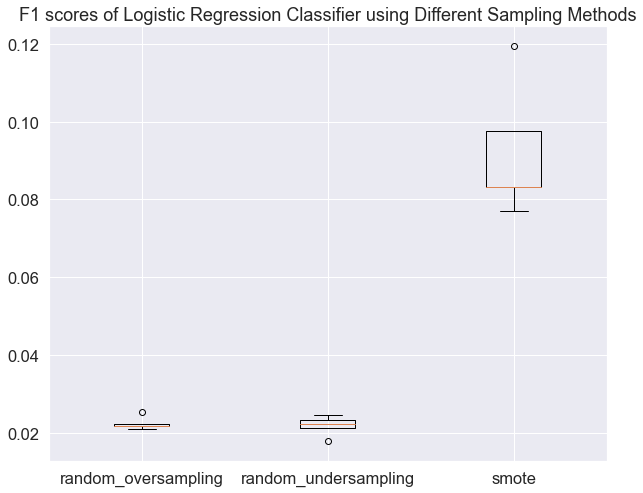

In [102]:
fig, ax = plt.subplots(figsize=(10,8))
plt.boxplot(sampling_cv_results.values())
ax.set_xticklabels(sampling_cv_results.keys())
plt.title('F1 scores of Logistic Regression Classifier using Different Sampling Methods')
plt.savefig('C:/Users/New User/Desktop/Fraud/sampling_comparison_log_reg.png')

# SMOTE produces best F1 score = .0921

# Model Performance Comparison Chart

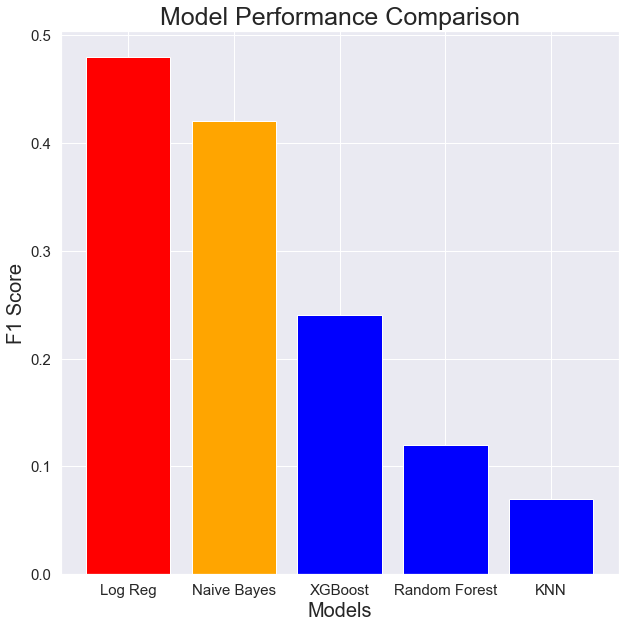

<Figure size 432x288 with 0 Axes>

In [51]:
# data
# 1) Logistic Regression (F1 .48)
# 2) KNN (F1 .07)
# 3) Naives Bayes (F1 .42)
# 4) Random Forest (F1 .12)
# 5) XGBoost (F1 .24)



x = ['Log Reg', 'Naive Bayes', 'XGBoost', 'Random Forest', 'KNN']
h = [.48, .42, .24, .12, .07]
c = ['red', 'orange', 'blue', 'blue', 'blue']

#bar plot
plt.figure(figsize=(10, 10))
plt.bar(x, height = h, color = c)
plt.xlabel("Models", fontsize=20)
plt.ylabel("F1 Score", fontsize=20)
plt.title("Model Performance Comparison", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig2 = plt.gcf()
plt.show()
plt.draw()

fig2.savefig("C:/Users/New User/Desktop/Fraud/model_performance.png", dpi=300)

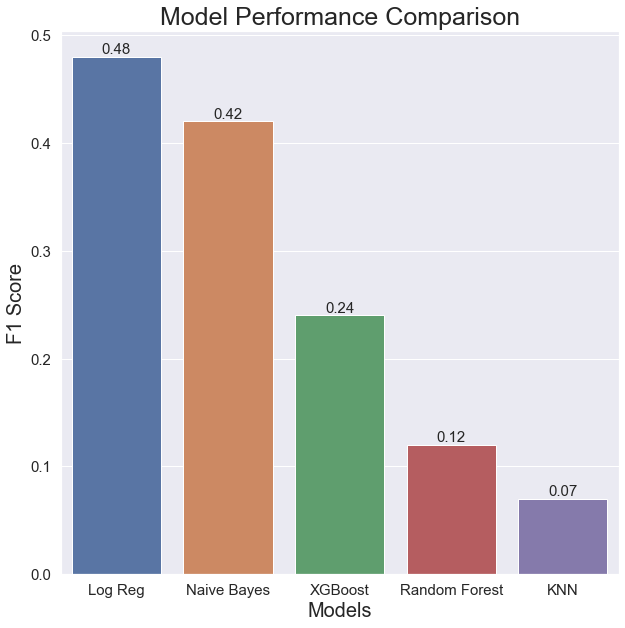

<Figure size 432x288 with 0 Axes>

In [47]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# Creating our own dataframe
data = {"Models": ['Log Reg', 'Naive Bayes', 'XGBoost', 'Random Forest', 'KNN'],
        "F1 Score": [.48, .42, .24, .12, .07]}
 
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
df = pd.DataFrame(data, columns=['Models', 'F1 Score'])
 
 
# Defining the plot size
plt.figure(figsize=(10, 10))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Models", y="F1 Score", data=df)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 7),
                   textcoords='offset points')
 
 
# Setting the title for the graph
plt.xlabel("Models", fontsize=20)
plt.ylabel("F1 Score", fontsize=20)
plt.title("Model Performance Comparison", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
 
# Finally showing the plot
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("C:/Users/New User/Desktop/Fraud/model_performance_sns_2.png", dpi=300)